In [1]:
import os, glob
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import cv2
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['figure.dpi'] = 144  
# figsize=(4, 4)

# Make numpy print 4 significant digits for prettiness
np.set_printoptions(precision=4, suppress=True)
np.random.seed(5) # To get predictable random numbers

## Load an MR Image

In [2]:
fname = 'USC/USC-Funct.mnc'
mrimg = nib.load(fname)

## See the image header

In [3]:
mrimg.header

In [4]:
mrimg.header.get_data_shape()

(160, 36, 64, 64)

## Spatial transformation matrix

In [5]:
mrimg.affine

array([[ -0.0063,   0.3344,  -2.9813,  83.4546],
       [ -0.3888,  -2.9639,  -0.3319, 123.7967],
       [  3.5789,  -0.3214,  -0.0413, -59.1774],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

## What are the dimensions of each voxel?

In [6]:
mrimg.header.get_zooms()

(3.6000001338909633, 3.000000079533037, 3.0000000635530903, 3.0)

## What are the dimensions of the image?

Ideally as `[x, y, z, t]` if image is in the correct oriention. But check the order of elements as they may be unexpected.


In [7]:
data = mrimg.get_data()
data.shape

(160, 36, 64, 64)

## Plot time series from the centre voxel of the centre slice

In [8]:
ts = data[:,
          data.shape[1]//2,
          data.shape[2]//2,
          data.shape[3]//2
          ]
t = np.linspace(0,np.size(ts),np.size(ts))

/Users/aaron/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


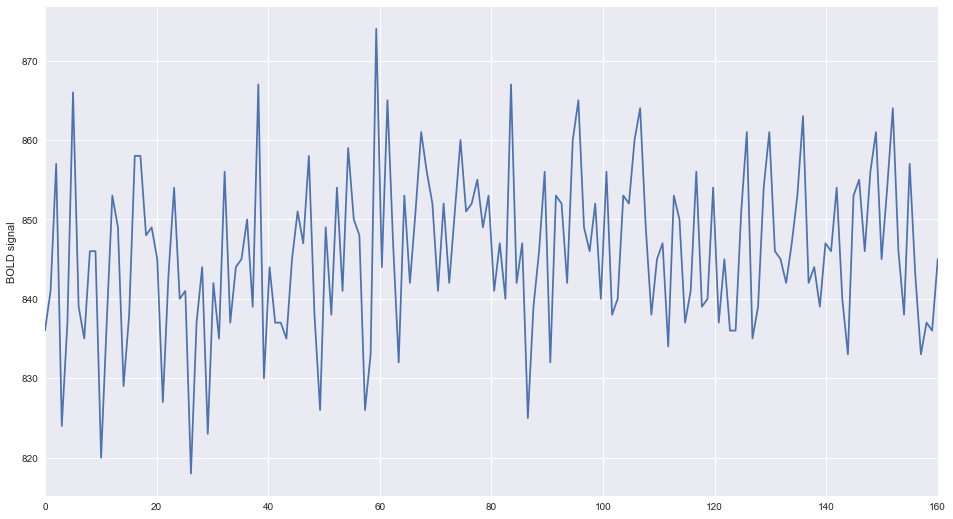

In [9]:
plt.figure(num=None, figsize=(16,9), 
          frameon='False');
sns.set(style="darkgrid")
sns.tsplot(data=ts, time=t, value="BOLD signal")
plt.show()

## Plot a slice
At the centre timepoint

In [10]:
sliceplane = data[data.shape[0]//2,
                  data.shape[1]//2,
                  :,:
                 ]

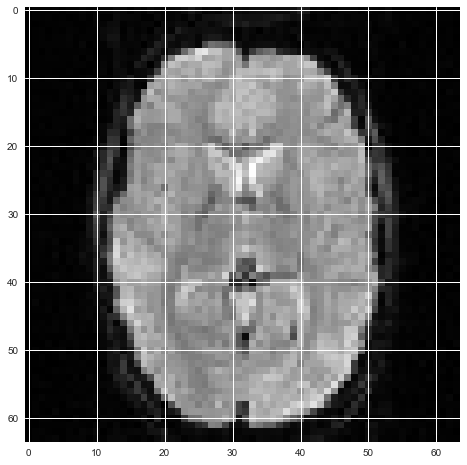

In [11]:
plt.figure(num=None, figsize=(8,8), 
          frameon='False');

plt.imshow(sliceplane, 
           cmap = 'gray')

matplotlib.rcParams['figure.dpi'] = 72  
# matplotlib.rcParams['savefig.dpi'] = 300
# plt.savefig('EPI_slice_grid.png')
plt.show();


## Plot saggital slice

In [12]:
sagg = data[data.shape[0]//2,
                  :,
                  :,
                  data.shape[3]//2
                 ]

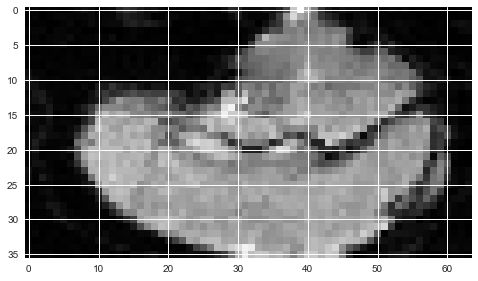

In [13]:
plt.figure(num=None, figsize=(8,8), 
          frameon='False');

plt.imshow(sagg, 
           cmap = 'gray')
plt.show();


## 2D Smoothing kernel

In [14]:
def sigma2fwhm(sigma):
    return sigma * np.sqrt(8 * np.log(2))
def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

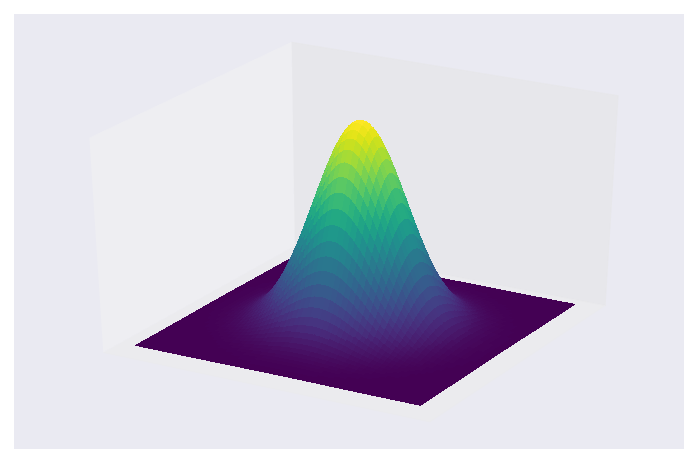

In [15]:
FWHM = 4
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 0.1
dy = 0.1
x = np.arange(-6, 6, dx)
y = np.arange(-6, 6, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

ax.plot_surface(x2d, y2d, kernel_2d,
               rstride=2, cstride=2, shade=True,
               cmap='viridis',
#                color='grey',
               linewidth=0, antialiased=False);
ax.grid(b='off')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# plt.savefig("2D_kernel.svg")
plt.show();

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

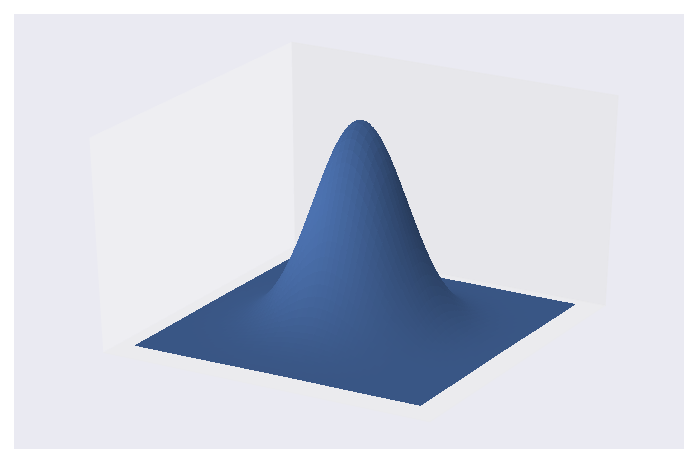

In [16]:
FWHM = 4
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 0.1
dy = 0.1
x = np.arange(-6, 6, dx)
y = np.arange(-6, 6, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

ax.plot_surface(x2d, y2d, kernel_2d,
               rstride=2, cstride=2, shade=True,
#                cmap='viridis',
#                color='grey',
               linewidth=0, antialiased=False);
ax.grid(b='off')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# plt.savefig("2D_kernel_solid.svg")
plt.show();

In [17]:
np.shape(sliceplane)[0]

64

In [18]:
np.shape(x2d)

(120, 120)

## Plot MRI slice as surface

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

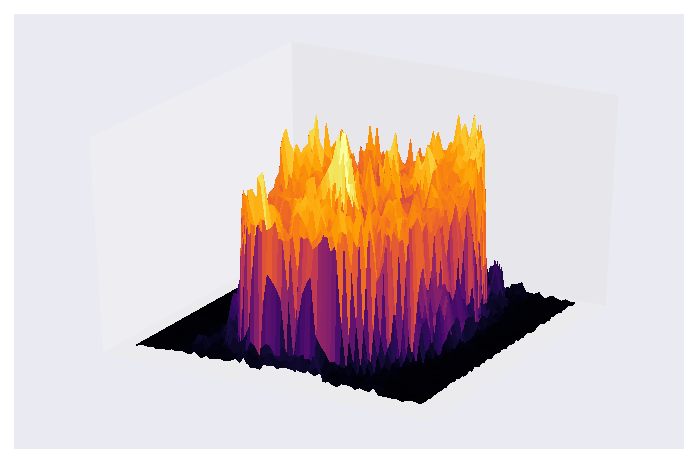

In [19]:
FWHM = 4
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

ax.plot_surface(x2d, y2d, sliceplane,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_unsmoothed_noticks_inferno.svg")

plt.show();

# Smooth w 8 mm kernel

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

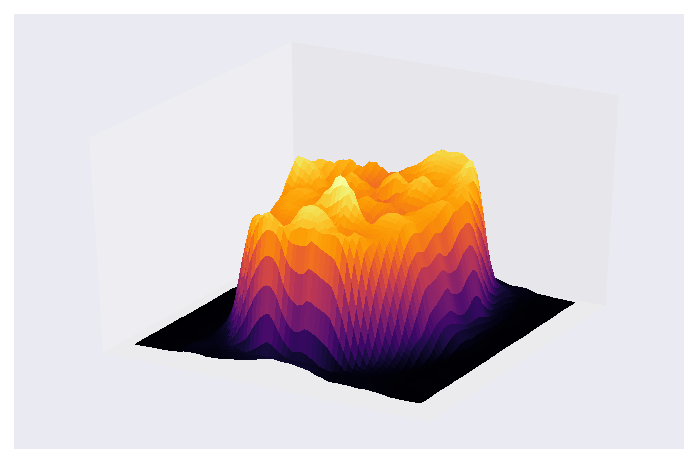

In [20]:
FWHM = 8
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_8mm.svg")

plt.show();

# 4 mm kernel

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

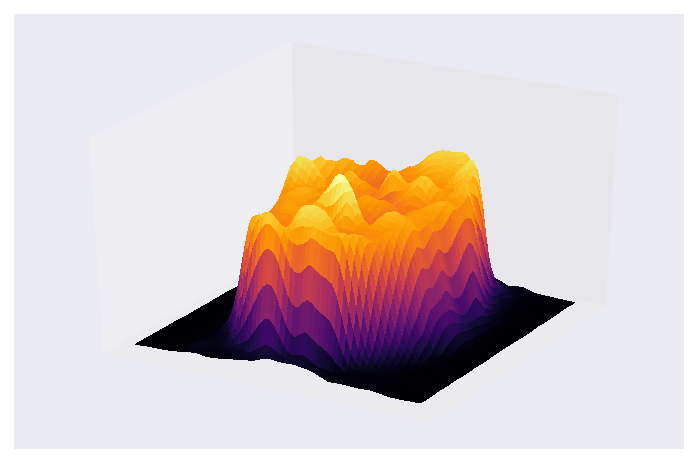

In [21]:
FWHM = 4
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_4mm.svg")

plt.show();

# 18 mm

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

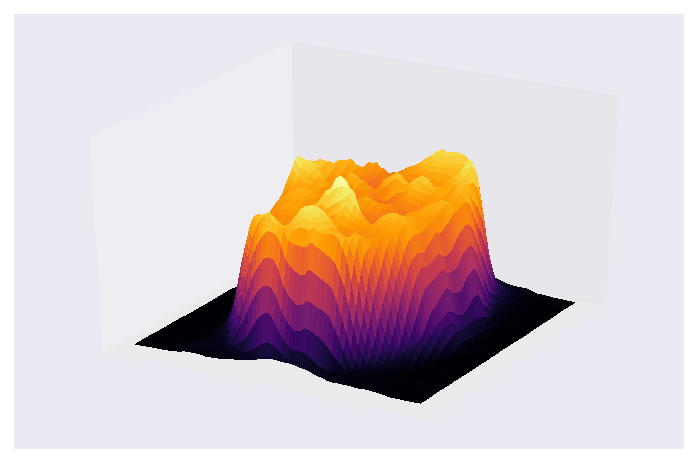

In [22]:
FWHM = 18
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_18mm.svg")

plt.show();

# 24 mm

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

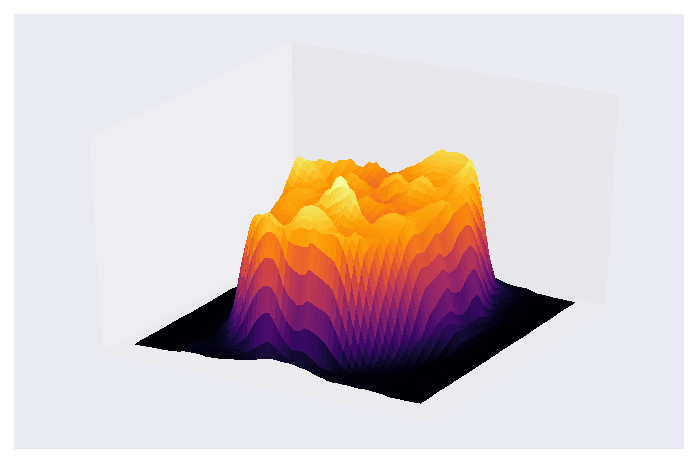

In [24]:
FWHM = 24
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_24mm.svg")

plt.show();

# 2 mm

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

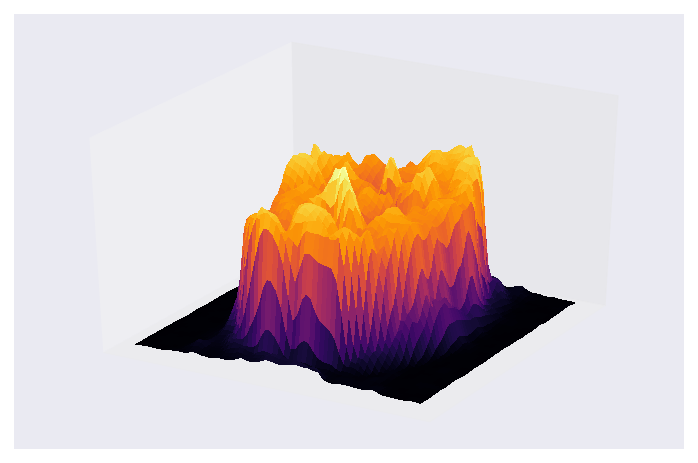

In [23]:
FWHM = 2
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_2mm.svg")

plt.show();

# 1.5 mm

/Users/aaron/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 864x576 with 0 Axes>

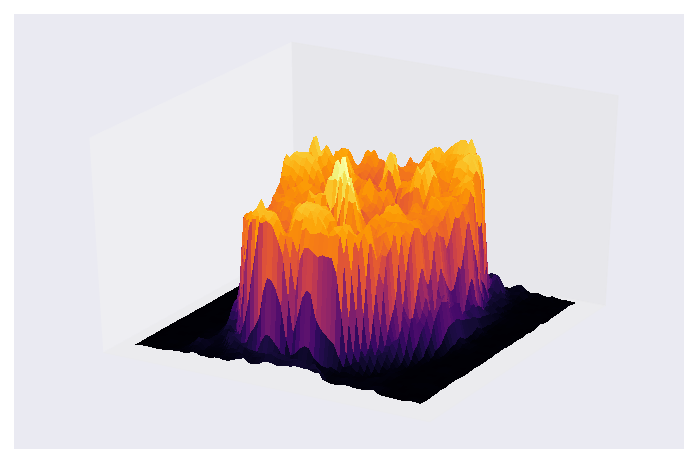

In [25]:
FWHM = 1.5
sigma = fwhm2sigma(FWHM)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.pyplot.viridis()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-np.shape(sliceplane)[1]/2, np.shape(sliceplane)[1]/2, dx)
y = np.arange(-np.shape(sliceplane)[0]/2, np.shape(sliceplane)[0]/2, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

# smoothed_sim_data = np.zeros(y2d.shape)
# for y_position in np.arange(np.size(y)):
#     for x_position in np.arange(np.size(x)):
#         kernel = np.exp(-((x2d-x_position) ** 2 + (y2d-y_position) ** 2) / (2 * sigma ** 2))
#         kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
#         smoothed_sim_data[x_position, y_position] = sum(sliceplane * kernel_2d)

s_img = cv2.GaussianBlur(sliceplane, (5,5), sigma)

ax.plot_surface(x2d, y2d, s_img,
                rstride=1, cstride=1, shade=True,
                cmap='inferno',
                linewidth=0, antialiased=False,
               );
ax.grid(b='on')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlim3d([0,1400])

# plt.savefig("2D_smoothed_noticks_inferno_1-5mm.svg")

plt.show();